Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "GISRSArtists"
COLLABORATORS = "Anne-Juul Welsink and Marrit Leenstra"

---

# Assignment

Wageningen University wants to determine the percentage of water on some parcels at the campus. Can you help?

## Determine how much area (m2 and percentage) of the combined WUR parcels are covered by water by using the BGT WFS (typename = bgt:waterdeel) and visualize both the water area and parcels in a map.

Wageningen University are specifically interested in parcels with "perceelnummer": ['10709', '10905', '10906', '10907', '10908', '10909', '11184', '11185', '11208', '11593']

Work with a project structure. There is a jupyter notebook file (.ipynb) made available for you.
You must fill in your code and assign your answers to specific names as specified within. You can import functions from a scripts folder as usual. If you find working in spyder more comfortable, you may first develop your solution in spyder, then copy over your code and check if it runs.

In your script, after downloading and selecting correct parcels, make a bounding box of the parcels which you will use to download water areas (hint .envelope, .exterior). You can create these functions:


    geocodePlacenameToCoordinate
    reproject
    downloadWFSToGeoDataFrame
    calculatePercentageArea
    makeWebmap or makeMap (for visualization you can choose to make a map with Folium or matplotlib)
    getBoundingBox


### assign your answers to variables with the name 'answer_fraction' (a fraction of 1) and 'answer_m2'

Go easy on webservices! There is no need to use for loops or while statements to call web services multiple times! Upload your documented and well structured Python scripts to a GitLab repository.

Hint: If you need some help how to make functions or how to import modules, have a look at the code in the Python refresher or in the cheat sheets mentioned in the Python refresher.



In [5]:
#space for imports, feel free to add your own or add another cell with imports in them:
import json
from owslib.wfs import WebFeatureService
import geopandas as gpd
import pandas as pd
from geopy.geocoders import Nominatim
from pyproj import Proj, transform
from python.reproject import reproject
from python.geocodePlacenameToCoordinates import geocodePlacenameToCoordinates
from python.downloadWFSToGeoDataFrame import downloadWFSToGeoDataFrame
from python.calculatePercentageArea import calculatePercentageArea
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

Water area = 23302.680876547754m2
Water fraction = 0.07876064341428342


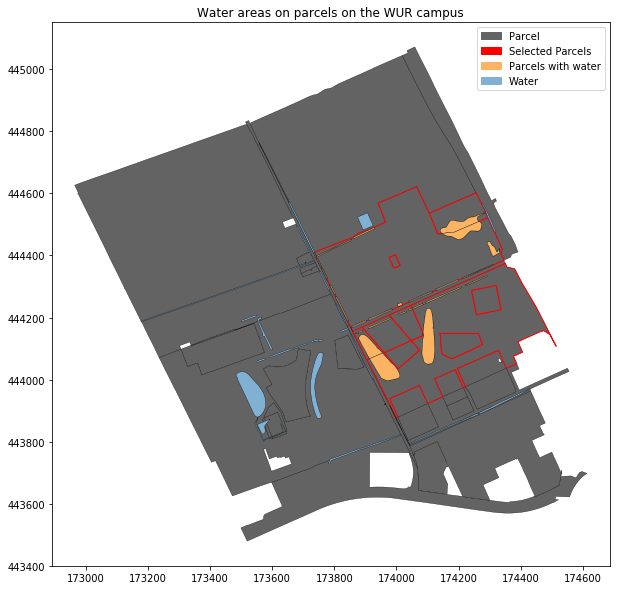

In [13]:
# get coordinates of Wageningen
try:
    wageningen = geocodePlacenameToCoordinates('Wageningen University')
except:
    print("Location not found")

# reproject to RD New
x, y = reproject(wageningen, '4326', '28992')

# download WFS parcels
parcelsWFSUrl = 'https://geodata.nationaalgeoregister.nl/kadastralekaartv3/wfs'
waterWFSUrl = 'https://geodata.nationaalgeoregister.nl/beta/bgt/wfs'
version = '2.0.0'
parcelsBBox = x-450, y-350, x+300, y+350
parcelGDF = downloadWFSToGeoDataFrame(parcelsWFSUrl, version, parcelsBBox, 'kadastralekaartv3:perceel')

waterGDF = downloadWFSToGeoDataFrame(waterWFSUrl, version, parcelsBBox, 'bgt:waterdeel')


# select parcels
parcelArray = ['10709', '10905', '10906', '10907', '10908', '10909', '11184', '11185', '11208', '11593']
selectedParcelGDF = gpd.GeoDataFrame(parcelGDF[parcelGDF['perceelnummer'].isin(parcelArray)])


water = calculatePercentageArea(selectedParcelGDF, waterGDF)
answer_m2 = sum(water.area)
parcelArea = sum(selectedParcelGDF.area)
answer_fraction = waterArea / parcelArea
print("Water area = " + str(answer_m2) + " m2")
print("Water fraction = " + str(answer_fraction))





In [1]:
#This cell is here to help you with finding trivial mistakes.

assert type(answer_fraction) == float  , 'check if answer_fraction is a number with decimal'
assert (answer_fraction<1.0) == True , 'check if answer_fraction is below 1'
assert type(answer_m2) == float , 'check if answer_m2 is a number with decimal'


NameError: name 'answer_fraction' is not defined

In [ ]:
#This cell has hidden tests in it, don't remove or move. It won't return any errors for you.


### Now plot a map of the water features and the administrative parcels surrounding them

In [ ]:
#Plot the map 
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Water areas on parcels on the WUR campus')
parcelGDF.plot(ax=ax, color='#636363', linewidth=0.3, edgecolor='black')
selectedParcelGDF.plot(ax = ax, color = '#636363', edgecolor = 'red')
waterGDF.plot(ax=ax, color='#80b1d3', linewidth=0.3, edgecolor='black')
water.plot(ax=ax, color='#fdb462', linewidth=0.3, edgecolor='black')
ParcelPatch = Patch(color='#636363', label='Parcel')
SelectedPatch = Patch(color='red', label='Selected Parcels')
IntersectPatch = Patch(color='#fdb462', label='Parcels with water')
WaterPatch = Patch(color='#80b1d3', label='Water')
plt.legend(handles=[ParcelPatch, SelectedPatch, IntersectPatch, WaterPatch])
ax.set_facecolor("white")
plt.axis('equal');
plt.show()

### Bonus: Calculate how much area (m2 and fraction) is water, per parcel. Present result nicely summarized in one table and also in a nice-looking map visualization (further below) of the relevant parcels and their (partial) coverage by water.

#### to be awarded points, assign your answer to a pandas DataFrame object named 'answer_bonus', which in turn accepts a python dictionary as an input. Note that the "column names" (called 'keys' when in a dictionary) have to be parcelID, m2, and fraction (order does not matter)

example: 

`answer_dict = {'parcelID': [1, 2], 'm2': [3, 4], 'fraction': [5, 6]}`

`answer_bonus=pandas.DataFrame(data=answer_dict)`

to show your table, just type line with answer_bonus and hit enter, or use print(answer_bonus)

In [ ]:
#Section for calculation and present table

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:

assert type(answer_bonus) == pd.core.frame.DataFrame, 'check if its a pandas dataframe'
assert 'parcelID' and 'm2' and 'fraction' in list(answer_bonus.columns.values) , 'check if the columns are named correctly'


In [ ]:
#Section for plotting map

# YOUR CODE HERE
raise NotImplementedError()